# LINEAR REGRESSION

**Libraries**

In [7]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

## 1. Dataset

Comme on n'a pas un dataset (x, y) sur lequel travailler, on va créér un en utilisant la fonction random de Numpy.
On le va définir le nombre de datapoints m = 100 et le nombre de features est n = 1 (c'est bien pour cela qu'on va utiliser le modele de linéare

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


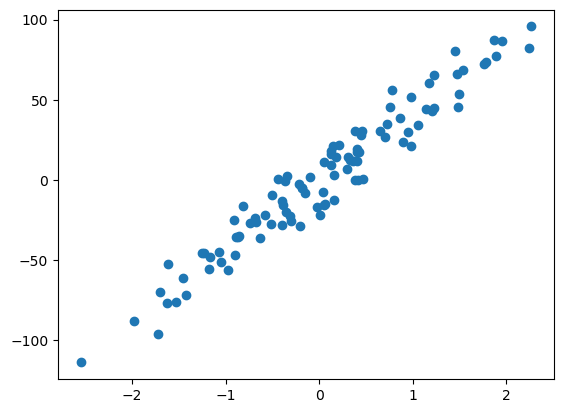

In [8]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
print(type(x))
print(type(y))

IMPORTANT
Vérifier les dimensions de x et y. On remarque que y n'a pas les dimesions (100,1). On corrige le probleme avec np.reshape

In [46]:
x_shape = x.shape
print(x_shape)

(100, 1)


In [47]:
y_shape = y.shape
print(y_shape)

(100,)


In [48]:
y = y.reshape(100,1)
y.shape

(100, 1)

Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [49]:
x.shape

(100, 1)

In [50]:
x_biais = np.ones(x.shape)
x_biais.shape

(100, 1)

In [51]:
X = np.hstack((x,x_biais))
X.shape

(100, 2)

Finalement, création d'un vecteur parametre $ \theta $ 
, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur   $ \theta $ 
, on utilise comme avant np.random.seed(0).

In [77]:
np.random.seed(0) # pour toujours reproduire les memes coeff
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

## 2. Model

On implémente un modele $ F = X.\theta $, puis on teste le modele pour voir s'il n'y a pas de bug (BONNE PRATIQUE OBLIGE). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $ \theta $

In [79]:
def model(matrice_X, matrice_theta):
    F_matrice = matrice_X.dot(matrice_theta)
    return F_matrice
print(model(X, theta).shape)
model(X, theta)

(100, 1)


array([[-0.23411339],
       [ 2.12299959],
       [ 1.10990892],
       [-1.0342754 ],
       [-1.16594332],
       [ 1.18315519],
       [-1.32381213],
       [ 1.15575705],
       [ 0.76756517],
       [-0.14943777],
       [-0.50092979],
       [ 0.62403678],
       [-2.30985707],
       [-0.30860539],
       [ 1.55317463],
       [ 2.47958608],
       [ 0.08276038],
       [ 3.55052624],
       [ 2.9655718 ],
       [-0.80788364],
       [ 2.12670225],
       [ 3.74460496],
       [-0.37262879],
       [ 0.95242502],
       [ 1.74266759],
       [ 1.77169089],
       [ 3.84142712],
       [ 0.98877619],
       [-0.21357803],
       [ 3.10405998],
       [-1.17949268],
       [-0.6209639 ],
       [-1.44954511],
       [ 1.06725569],
       [ 0.41867979],
       [ 1.21652933],
       [ 0.65425761],
       [-0.31106803],
       [ 0.49179161],
       [-1.80983939],
       [ 2.26026525],
       [ 1.10605547],
       [-2.60979272],
       [ 4.35321011],
       [ 0.71314621],
       [ 0

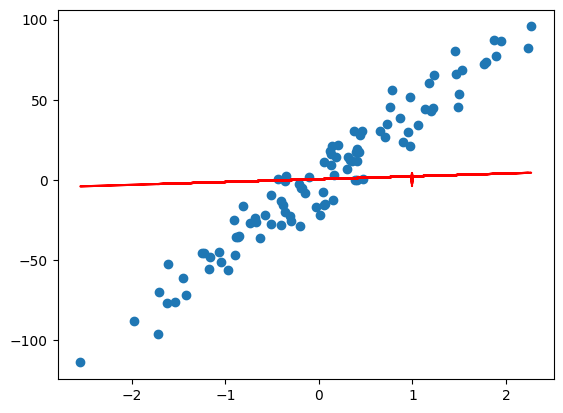

In [78]:
plt.scatter(x,y)
plt.plot(X, model(X, theta), "r")

## 3. Cost fonction: Erreur Quadratique moyenne

On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais

$J( \theta) = \frac{1}{2m}  \sum (X. \theta - y ) ^ 2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [82]:
def cout(X, y, theta):
    m = len(y)
    J = 1 /(2*m) * np.sum((model(X, theta) - y)**2)
    return J  

In [83]:
cout(X, y, theta)

905.6306841935502

## 4. Gradients et Descente de Gradient

On implémente la formule du gradient pour la **MSE**

$ \frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y) $

In [85]:
def grad(matrix_x, matrix_y, matrix_theta):
    m = len(x)
    X_transp = matrix_x.T
    delta = 1/m * (X_transp).dot(model(matrix_x, matrix_theta) - y)
    return delta

Ensuite on utilise cette fonction dans la descente de gradient:

$ \theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta} $

In [91]:
def gradient_descent(n_iterations, learning_rate, X, y, theta):
    
    cost_history = np.zeros(n_iterations) #tableau intialisé avec des valeur zero pour ensuite les completer et avoir un suivi de l'évolution du cout du modele
    
    for i in range(0,n_iterations):
        
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cout(X, y, theta)
        
    return theta, cost_history

## 5. Phase d'entrainement

On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage $ \alpha $
, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [92]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(n_iterations, learning_rate, X, y, theta)

In [93]:
theta_final

array([[42.61765864],
       [-0.81309274]])

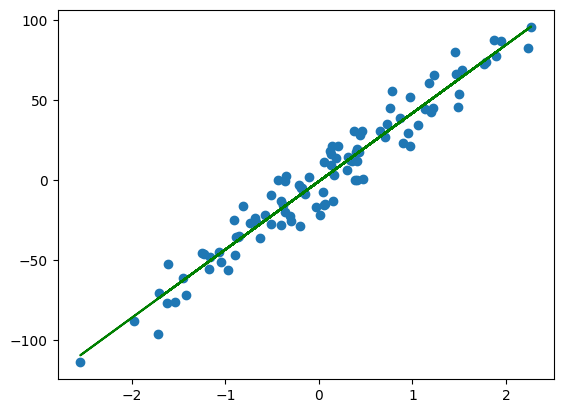

In [94]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='green')

## 6. Courbes d'apprentissage

Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

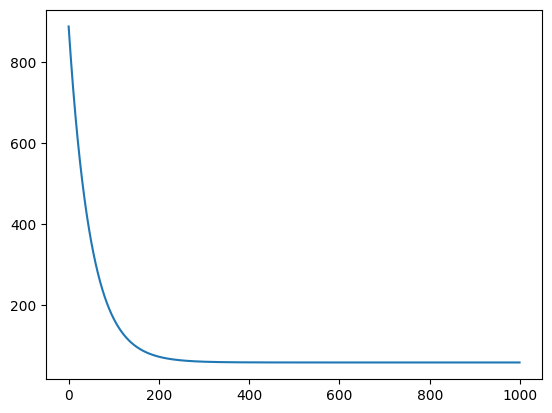

In [97]:
plt.plot(cost_history)

## 7. Evaluation finale

Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le coefficient de détermination, aussi connu sous le nom  $ R^2 $
. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [98]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [99]:
coef_determination(y, predictions)

0.9417294706504984